# Segmentation de la matrice 
## 1- Configuration de  l'environnement de travail

In [3]:
import tifffile
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## 2- Chargement des images en 3D

In [4]:
# Charger les images en 3D
stack_3d = imread("/home/experiences/grades/saras/Documents/DATA_SWING/01_processed_data/tomo_sain61_si_dej_S00017_to_S00504_480x480_gpu_1modes_200DM500ML_recons_S/02_crop_data/image_3D/03_crop_data.tif")

# Visuliasation interactive avec Sackview
stackview.slice(stack_3d)


# Classification par k-means

In [6]:
# Charger le volume
volume = tifffile.imread("/home/experiences/grades/saras/Documents/DATA_SWING/01_processed_data/tomo_sain61_si_dej_S00017_to_S00504_480x480_gpu_1modes_200DM500ML_recons_S/02_crop_data/image_3D/03_crop_data.tif")
print("Volume shape:", volume.shape)


Volume shape: (551, 800, 800)


## Segmentation des trois classes

In [9]:
# Appliquer K-means avec 3 classes
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(flat)
segmented = labels.reshape(volume.shape)

In [10]:
# Calculer les moyennes d'intensité de chaque classe
means = [np.mean(volume[segmented == i]) for i in range(3)]
sorted_classes = np.argsort(means)  # du plus sombre au plus clair

In [11]:
# Associer les classes
air_label = sorted_classes[0]       # plus sombre
collagen_label = sorted_classes[1]  # intermédiaire
hap_label = sorted_classes[2]       # plus clair

In [12]:
# Créer les masques binaires
air_mask = segmented == air_label
collagen_mask = segmented == collagen_label
hap_mask = segmented == hap_label

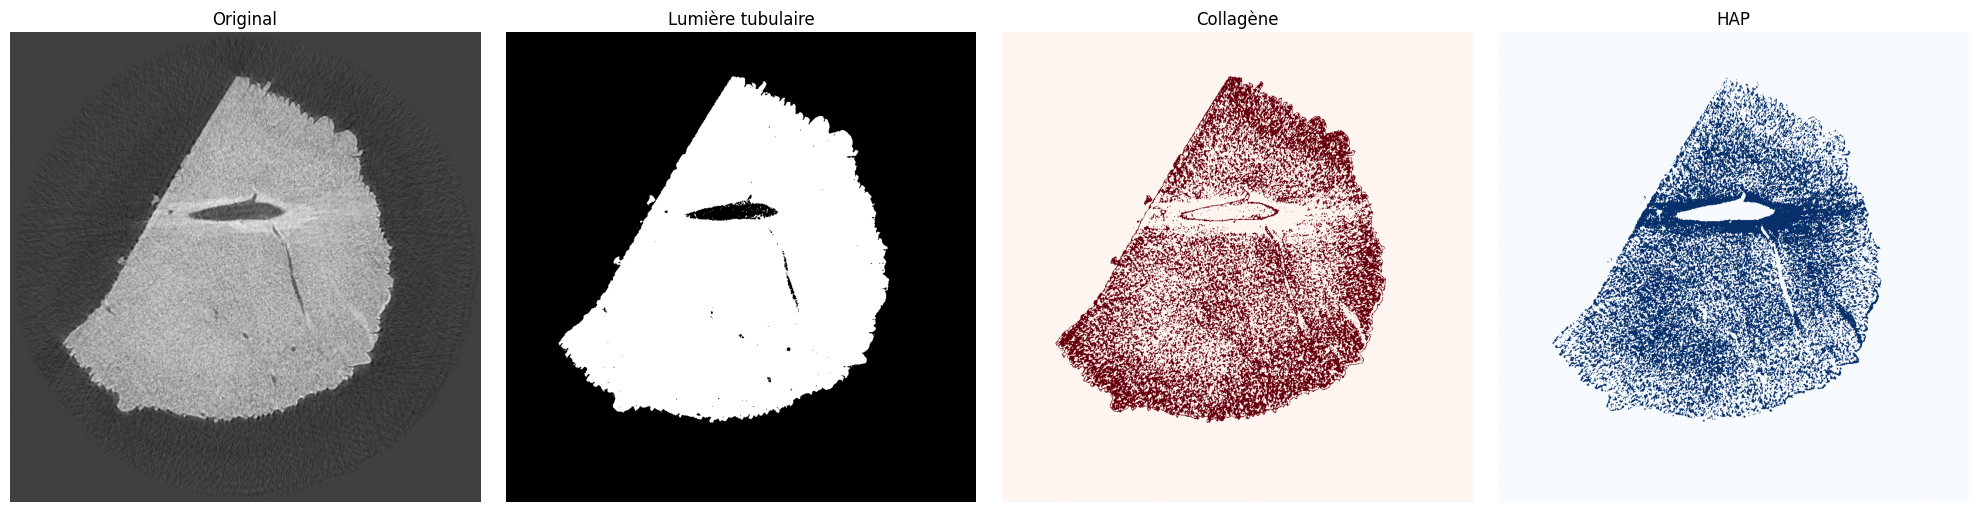

In [13]:
mid_z = volume.shape[0] // 2

fig, axs = plt.subplots(1, 4, figsize=(20, 5))
axs[0].imshow(volume[mid_z], cmap='gray')
axs[0].set_title("Original")

axs[1].imshow(air_mask[mid_z], cmap='Greys')
axs[1].set_title("Lumière tubulaire")

axs[2].imshow(collagen_mask[mid_z], cmap='Reds')
axs[2].set_title("Collagène")

axs[3].imshow(hap_mask[mid_z], cmap='Blues')
axs[3].set_title("HAP")

for ax in axs:
    ax.axis('off')
plt.tight_layout()
plt.show()

In [15]:
# Créer le dossier de sortie
output_dir = "/home/experiences/grades/saras/Documents/DATA_SWING/01_processed_data/tomo_sain61_si_dej3/05_k_means/"
os.makedirs(output_dir, exist_ok=True)

# Convertir les masques booléens en uint8 (0 ou 255)
air_mask_uint8 = air_mask.astype(np.uint8) * 255
collagen_mask_uint8 = collagen_mask.astype(np.uint8) * 255
hap_mask_uint8 = hap_mask.astype(np.uint8) * 255

# Sauvegarder les masques au format TIF
tifffile.imwrite(os.path.join(output_dir, "mask_air.tif"), air_mask_uint8)
tifffile.imwrite(os.path.join(output_dir, "mask_collagen.tif"), collagen_mask_uint8)
tifffile.imwrite(os.path.join(output_dir, "mask_hap.tif"), hap_mask_uint8)

print("Masques sauvegardés dans le dossier :", output_dir)


Masques sauvegardés dans le dossier : /home/experiences/grades/saras/Documents/DATA_SWING/01_processed_data/tomo_sain61_si_dej3/05_k_means/
